**D1DAE: Análise Estatística para Ciência de Dados (2021.1)** <br/>
IFSP Campinas

Profs: Ricardo Sovat, Samuel Martins <br/><br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Probability Distributions

## 1.2. Binomial Distribution

<img src="./imgs/binomial_distribution_ex.png" width=500/>

### Exercise 1

In an admission test for the Data Science specialization, **10 questions** with  **3 possible choices** in each question.<br/>
**Each question scores equally**. Suppose that a candidate have not been prepared for the test. She decided to guess all answers.<br/>
Let the test has the **maximum score of 10** and **cut-off score of 5** for being approved for the next stage.<br/>

Provide the _probability_ that this candidate will **get 5 questions right**, and the _probability_ that she will **advance to the next stage of the test**.<br/><br/>


#### Is this a Binomial experiment?

#### 1. How many trials (n)? (Fixed number of identical trials)

In [2]:
n = 10
n

10

#### 2. Are the trials independent?

Yes. One option chosen for a given question does not influence the chosen answer for the other questions.

#### 3. Are only two outcomes possible per trial?

Yes. The candidate has two possibilities: **hit** or **miss** the question.

#### 4. What is the probability of success (p) and failure (q)?

In [3]:
# question ==> 'trial´ 
n_choices_per_question = 3

In [4]:
# probabilidade de acertar uma questão
p = 1 / n_choices_per_question
p

0.3333333333333333

In [5]:
# probabilidade de errar uma questão
q = 1 - p
q

0.6666666666666667

Therefore, it is a **Binomial experiment**.

#### What is the total number of events that you want to get successes (x)? 

In [6]:
# queremos 5 questões corretas entre as 10 respondidas
x = 5
x

5

<br/>

#### Q1. What is the _probability_ that the candidate will get 5 questions right?

##### Solution 1

In [7]:
from scipy.special import comb

In [8]:
probability = comb(n, x) * (p ** x) * (q ** (n - x))
probability

0.13656454808718185

##### Solution 2

In [9]:
from scipy.stats import binom

In [10]:
probability = binom.pmf(x, n, p)
probability

0.1365645480871819

<br/>

#### Q2. How likely is the candidate to pass the test? (What is the _probability_ for that?)
<center><img src="./imgs/binomial_distribution_ex_Q2.png" width=500/></center>

##### Solution 1

In [11]:
probability = 0.0

# para cada número de questões acertadas possíveis para
# o cenário estudado
for x in range(5, 11):
    probability += binom.pmf(x, n, p)

In [12]:
probability

0.21312808006909525

##### Solution 2

In [13]:
1 - binom.cdf(4, n, p)

0.21312808006909512

##### Solution 3
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [14]:
# a função abaixo é exatamente igual a:
# 1 - binom.cdf(4, n, p)
binom.sf(4, n, p)

0.21312808006909517

<br/>

### Exercise 2

In the last World Chess Championship, **the proportion of female participants was 60%.** <br/>
**The total of teams, with 12 members, in this year's championship is 30.** <br/>
According to these information, **how many teams should be formed by 8 women?** <br/><br/>



Let's first calculate the probability of a team has 8 women.

#### 1. How many trials (n)? (Fixed number of identical trials)

In [15]:
n = 12
n

12

#### 2. Are the trials independent?

Yes. The gender of each member is independent.

#### 3. Are only two outcomes possible per trial?

Yes: woman (success) and others (failure).

#### 4. What is the probability of success (p) and failure (q)?

In [16]:
p = 0.6
p

0.6

#### What is the total number of events that you want to get successes (x)? 

In [17]:
x = 8
x

8

#### Q: How many teams (out of 30) should be formed by 8 women?

In [18]:
# probability of a team (12 members) having 8 women
probability = binom.pmf(x, n, p)
probability

0.2128409395199996

##### Solution

#### mean = n * p

In [19]:
n = 30  # teams
n

30

In [20]:
p = probability  # probability of a team having 8 woman
p

0.2128409395199996

In [21]:
# What is the expected value (mean) of 30 trials (teams) having teams with 8 woman? 
n_teams = n * p
n_teams

6.385228185599988

<br/>

## 1.3. Poisson Distribution

<img src="./imgs/poisson_distribution_formula.png" width=600/>

### Exercise 1

A restaurant receives **20 orders per hour**. What is the chance that, at a given hour chosen at random, the restaurant will receive **15 orders**?

#### What is the mean number of occurrences per hour? (𝜆)

In [22]:
lambda_ = 20
lambda_

20

#### What is the desired number of occurrences within the period of time? (x)

In [23]:
x = 15
x

15

##### Solution 1

In [24]:
probability = ((np.e ** (-lambda_)) * (lambda_ ** x)) / np.math.factorial(x)
probability

0.0516488535317584

##### Solution 2
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

In [25]:
from scipy.stats import poisson

In [26]:
probability = poisson.pmf(x, lambda_)
probability

0.05164885353175814

### Exercise 2

Vehicles pass through a junction on a busy road at an average rate of 300 per hour. <br/>

#### **Q1**: Find the probability that none passes in a given minute.

##### The average number of cars per minute (𝜆)

In [27]:
lambda_ = 300 / 60
lambda_

5.0

##### What is the desired number of occurrences within the period of time? (x)

In [28]:
x = 0
x

0

In [29]:
probability = poisson.pmf(x, lambda_)
probability

0.006737946999085467

#### **Q2**: What is the expected number (average number) passing in two minutes?

In [30]:
# alpha: average number of cars per ONE minute
expected_number_per_two_minutes = lambda_ * 2
expected_number_per_two_minutes

10.0

#### **Q3**: Find the probability that this expected number actually pass through in a given two-minute period.
Given that the average rate of vehicles that pass through in a busy road in **two minutes** is **10**, which is the probability of passing through **exactly 10 vehicles** in a given two-minute period?

##### The average number of cars per two minutes (𝜆)

In [31]:
lambda_ = expected_number_per_two_minutes
lambda_

10.0

##### What is the desired number of occurrences within the period of time? (x)

In [32]:
x = 10
x

10

In [33]:
probability = poisson.pmf(x, lambda_)
probability

0.12511003572113372

### Exercise 3

Suppose the **average number of lions** seen on a **1-day safari** is **5**. What is the probability that tourists will see **fewer than four lions** on the next 1-day safari?

#### What is the mean number of lions seen on a 1-day safari? (𝜆)

In [34]:
lambda_ = 5
lambda_

5

#### What is the desired number of occurrences within the period of time? (x)
x = 0, 1, 2, or 3

<img src="./imgs/poisson_distribution_ex3.png" width=400/>

##### Solution 1

In [35]:
probability = 0.0

for x in range(4):
    probability += poisson.pmf(x, lambda_)

probability

0.26502591529736164

##### Solution 2

In [36]:
probability = poisson.cdf(3, lambda_)
probability

0.2650259152973616

<br/>

## 1.4. Normal Distribution

<img src="./imgs/standard_normal_distribution_formula.png" width=700/>

### Exercise 1

When studying the height of the inhabitants of Pompeia, it was found that its **distribution is approximately normal**, with **mean** of 1.70 m and **standard deviation** of 0.1 m.

In [37]:
mean = 1.7
std = 0.1

#### Q1: Probability of a person, selected by chance, is less than 1.8m tall? P(X < 1.8)

In [38]:
x = 1.8
x

1.8

In [39]:
z = (x - mean) / std
z

1.0000000000000009

##### **P(X < 1.8) = P(Z < 1.000)**

##### Solution 1 - Using the z-score table
https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf

Checking the z-score table, **P(Z < 1.000)=0.84134**

##### Solution 2 - Using scipy

In [40]:
from scipy.stats import norm

In [41]:
probability = norm.cdf(1.000)
probability

0.8413447460685429

#### Q2: Probability of a person, selected by chance, is between 1.6m and 1.8m tall? P(1.6 <= X <= 1.8)
P(1.6 <= X <= 1.8) = P(X < 1.8) - P(X < 1.6)

In [42]:
a = 1.6
b = 1.8

In [43]:
z_a = (a - mean) / std
z_b = (b - mean) / std

z_a, z_b

(-0.9999999999999987, 1.0000000000000009)

**P(1.6 <= X <= 1.8) = P(Z < -0.9999) - P(Z < 1.00000)**

##### Solution 1 - Using the z-score table
https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf

In [44]:
prob_a = 0.16109
prob_b = 0.84134

In [45]:
probability = prob_b - prob_a
probability

0.68025

##### Solution 2 - Using scipy

In [46]:
probability = norm.cdf(z_b) - norm.cdf(z_a)
probability

0.6826894921370857

#### Q3: Probability of a person, selected by chance, is over 1.9m tall? P (X >= 1.9)
P(X >= 1.9) = 1 - P(X < 1.9)

In [47]:
x = 1.9
x

1.9

In [48]:
z = (x - mean) / std
z

1.9999999999999996

**P(X >= 1.9) = P(Z >= 1.99999) = 1 - P(Z < 1.99999)**

##### Solution 1 - Using the z-score table
https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf

In [49]:
cdf_z = 0.97725 # considerei z=2
probability = 1 - cdf_z
probability

0.022750000000000048

##### Solution 2 - Using scipy

In [50]:
probability = 1 - norm.cdf(z)
probability

0.02275013194817921

<br/>

# 2. Central Limit Theorem

**Dataset:** https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [51]:
# dataset with data about stroke patients
df = pd.read_csv('./datasets/healthcare-dataset-stroke-data.csv')

In [52]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [53]:
population = df['avg_glucose_level']
population.head()

0    228.69
1    202.21
2    105.92
3    171.23
4    174.12
Name: avg_glucose_level, dtype: float64

In [55]:
population.shape

(5110,)

In [56]:
population_mean = population.mean()
population_mean

106.1476771037182

In [57]:
population_std = population.std()
population_std

45.28356015058198

Text(111.1476771037182, 350, 'Population Mean\n106.15')

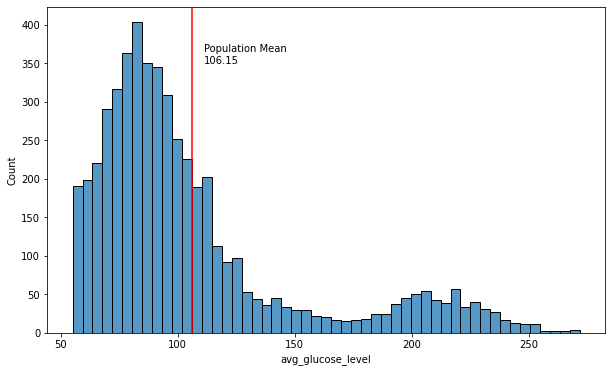

In [58]:
plt.figure(figsize=(10,6))
ax = sns.histplot(population)  # the distribution is not normal
ax.axvline(x=population_mean, color='red')
ax.annotate(f'Population Mean\n{population_mean:.2f}', xy=(population_mean + 5, 350))

<br/>

#### The data distribution of a sample does not necessarily follow the **normal distribution**

In [59]:
sample_100 = population.sample(100)

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

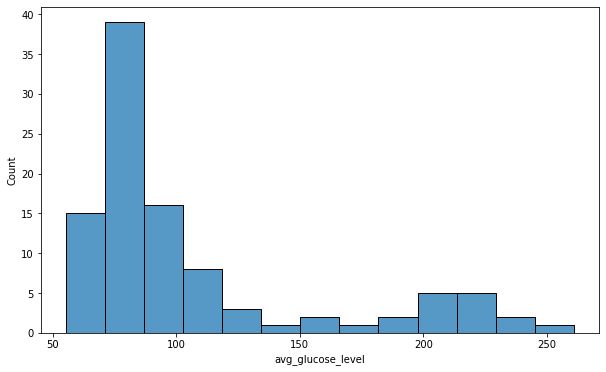

In [60]:
plt.figure(figsize=(10,6))
sns.histplot(sample_100)

#### As the sample size increases, the **sampling distribution of the mean** approaches a **normal distribution** with the **sampling distribution’s mean** equals **the population mean**

In [61]:
# Dictionary where each key correspond to a sample size
# For each sample size, there is a dataframe with 1000 samples associated to
samples = {}

for n in [5, 10, 30, 100, 1000]:
    df_sample_size = pd.DataFrame()
    
    for i in range(1000):
        sample = population.sample(n)
        sample.reset_index(drop=True, inplace=True)  # requires this "trick" to work
        df_sample_size[f'Sample #{i}'] = sample
    
    samples[n] = df_sample_size

In [62]:
samples.keys()

dict_keys([5, 10, 30, 100, 1000])

In [63]:
samples[5]

,Sample #0,Sample #1,Sample #2,Sample #3,Sample #4,Sample #5,Sample #6,Sample #7,Sample #8,Sample #9,...,Sample #990,Sample #991,Sample #992,Sample #993,Sample #994,Sample #995,Sample #996,Sample #997,Sample #998,Sample #999
0,114.61,62.55,119.62,79.85,124.35,97.26,58.30,88.53,67.96,267.61,...,78.38,109.10,82.32,186.45,77.91,70.09,84.40,78.59,76.26,89.13
1,146.61,114.16,90.77,86.94,198.33,73.70,78.57,92.08,68.27,62.60,...,168.15,89.05,87.93,197.10,96.75,90.35,88.17,105.48,66.32,161.57
2,189.88,61.61,206.52,116.04,190.70,112.19,75.02,114.53,97.53,196.61,...,222.66,116.78,83.88,62.78,78.98,112.19,77.42,123.87,72.49,114.16
3,67.55,73.24,113.45,85.33,82.21,85.35,83.91,70.54,73.39,91.35,...,93.89,104.08,88.85,64.29,72.76,212.01,64.09,106.41,195.23,91.35
4,79.53,101.58,64.51,202.51,65.44,67.07,153.38,131.05,196.26,76.34,...,74.66,64.60,96.42,88.48,72.84,80.33,90.78,107.47,76.63,111.13


In [64]:
samples[100]

,Sample #0,Sample #1,Sample #2,Sample #3,Sample #4,Sample #5,Sample #6,Sample #7,Sample #8,Sample #9,...,Sample #990,Sample #991,Sample #992,Sample #993,Sample #994,Sample #995,Sample #996,Sample #997,Sample #998,Sample #999
0,90.78,111.21,107.21,72.13,74.90,254.63,94.34,87.20,64.41,95.44,...,82.37,96.86,152.84,106.74,207.95,82.59,74.86,68.35,195.74,147.48
1,79.80,197.28,197.28,196.25,107.59,191.33,145.50,85.07,81.38,111.81,...,76.35,106.54,62.27,216.07,112.69,88.98,60.36,113.85,137.27,92.71
2,94.26,103.08,102.61,73.89,158.48,228.08,77.59,151.16,120.46,111.41,...,121.99,147.14,84.59,94.59,79.20,113.11,224.71,112.54,58.48,62.69
3,133.82,205.00,172.27,84.41,63.72,104.09,84.03,128.04,75.50,137.74,...,80.80,193.83,74.42,97.28,190.13,72.04,81.54,105.90,237.17,59.52
4,69.28,140.28,99.83,85.87,125.43,97.64,106.51,95.89,80.89,77.87,...,142.82,67.80,218.54,87.15,73.66,122.25,92.49,78.45,65.98,88.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,112.96,111.71,78.30,73.48,139.81,87.74,72.10,232.64,86.00,101.87,...,110.42,123.65,76.03,93.04,219.39,107.97,89.06,271.74,212.19,100.05
96,112.19,123.49,113.05,67.29,82.62,58.25,96.01,94.04,60.61,102.58,...,170.88,72.67,55.83,116.76,79.89,76.57,80.80,74.16,109.02,199.38
97,69.88,75.52,57.02,80.73,72.53,97.93,114.32,59.49,80.93,94.06,...,86.97,91.09,90.10,95.59,130.34,207.32,65.61,127.18,78.98,81.54
98,111.77,85.84,64.99,72.08,81.88,140.93,99.49,113.20,73.48,95.31,...,90.04,75.05,83.88,101.12,103.44,79.55,96.18,82.68,81.10,147.04


In [65]:
# mean of each one of the 1000 samples with sample size of 100
samples[100].mean()

Sample #0      101.6154
Sample #1      102.2013
Sample #2      113.2830
Sample #3      108.7638
Sample #4       99.7128
                 ...   
Sample #995    108.1857
Sample #996    102.6727
Sample #997    106.9843
Sample #998    113.1734
Sample #999    110.1905
Length: 1000, dtype: float64

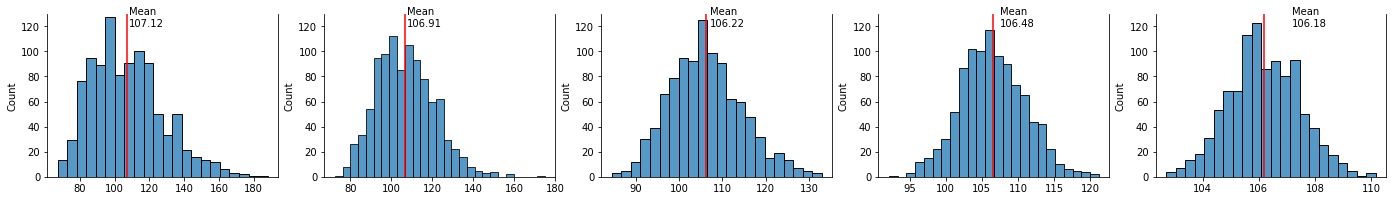

In [66]:
sample_sizes = sorted(samples.keys())

fig, axs = plt.subplots(1, 5, figsize=(24, 3))

for i, n in enumerate(sample_sizes):
    sampling_distribution = samples[n].mean()
    mean_of_sampling_distribution = sampling_distribution.mean()
    
    ax = sns.histplot(sampling_distribution, ax=axs[i])
    axs[i].axvline(x=mean_of_sampling_distribution, color='red')
    ax.annotate(f'Mean\n{mean_of_sampling_distribution:.2f}', xy=(mean_of_sampling_distribution + 1, 120))
    ax.spines['top'].set_visible(False)
    ax.set_ylim([0, 130])

#### Standard error

<img src='./imgs/standard_error.png' width=150 />

In [68]:
population_std

45.28356015058198

In [70]:
sample_sizes

[5, 10, 30, 100, 1000]

In [72]:
print(f'Population standard deviation = {population_std:.2f}\n')

for n in sample_sizes:
    standard_error = population_std / np.sqrt(n)
    print(f'Standard Error for n={n}: {standard_error:.2f}')

Population standard deviation = 45.28

Standard Error for n=5: 20.25
Standard Error for n=10: 14.32
Standard Error for n=30: 8.27
Standard Error for n=100: 4.53
Standard Error for n=1000: 1.43


**The larger the sample size, the smaller the standard error.**

<br/>

# 3. Confidence Interval

<img src='./imgs/confidence_interval.png' width=700 />

- A **90% level of confidence** has 𝜶 = 0.10 and **critical value** of 𝑧𝛼/2 = 1.64.
- A **95% level of confidence** has 𝜶 = 0.05 and **critical value** of 𝑧𝛼/2 = 1.96.
- A **99% level of confidence** has 𝜶 = 0.01 and **critical value** of 𝑧𝛼/2 = 2.58.

## Exercise 1
Suppose the heights of the inhabitants of a city are **normally distributed** with **population standard deviation** of 20 cm.
We measure the heights of **40** randomly chosen people, and get a **mean height** of 1.75 m.
Construct a **confidence interval** for the population mean with a **significance level of 5%**.

### Sample size

In [92]:
sample_size = 40
sample_size

40

### Population standard deviation and sample mean

In [93]:
population_std = 20
population_std

20

In [94]:
sample_mean = 175  # converting to the same unit
sample_mean

175

### Significance level (α)

In [95]:
significance_level = 0.05
significance_level

0.05

### Confidence level (1 - α)

In [96]:
confidence_level = 1 - significance_level
confidence_level

0.95

### Critical value (𝒛𝜶/𝟐 = z0.025)

In [97]:
critical_value = 1.96
critical_value

1.96

### Standard Error (SE)

In [98]:
standard_error = population_std / np.sqrt(n)
standard_error

3.162277660168379

### Margin of Error

In [99]:
margin_of_error = critical_value * standard_error
margin_of_error

6.198064213930023

### 95% Confidence Interval

#### Solution 1 - manually

In [100]:
confidence_interval = (
    sample_mean - margin_of_error,
    sample_mean + margin_of_error
)
confidence_interval

(168.80193578606998, 181.19806421393002)

#### Solution 2 - Scipy
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

alpha ==> confidence level <br/>
loc ==> sample mean  <br/>
scale ==> standard error

In [101]:
from scipy.stats import norm

In [102]:
norm.interval(alpha=confidence_level, loc=sample_mean, scale=standard_error)

(168.8020496769544, 181.1979503230456)

## Exercise 2
Given a dataset from stroke patients, we want to study their mean glucose level. <br/>
For two samples of 100 and 1000 observations, provide a 95% confidence intervals for the following scenarios:

**(a) Known population standard deviation** <br/>
**(b) Unknown population standard deviation**

**Dataset:** https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [103]:
# dataset with data about stroke patients
df = pd.read_csv('./datasets/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [104]:
population = df['avg_glucose_level']
population

0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 5110, dtype: float64

In [105]:
population_mean = population.mean()
population_mean

106.1476771037182

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

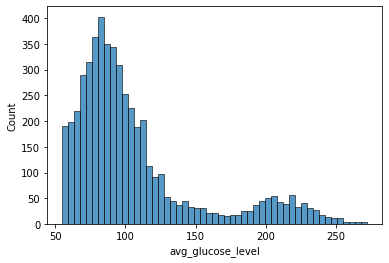

In [106]:
sns.histplot(data=population)

#### Population Mean = 106.1476771037182

In [107]:
population_std = population.std()
population_std

45.28356015058198

In [109]:
confidence_level = 0.95
confidence_level

0.95

In [110]:
significance_level = 1 - confidence_level
significance_level

0.050000000000000044

In [111]:
sample_100 = population.sample(100, random_state=999)
sample_100

4358     80.94
4779     66.71
931      78.11
3917     90.00
1095    103.94
         ...  
1566    101.43
222     205.35
3075     80.92
580     107.47
1947     65.95
Name: avg_glucose_level, Length: 100, dtype: float64

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

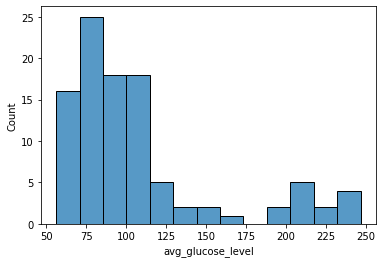

In [112]:
sns.histplot(data=sample_100)

In [113]:
sample_1000 = population.sample(1000, random_state=999)
sample_1000

4358     80.94
4779     66.71
931      78.11
3917     90.00
1095    103.94
         ...  
3278     84.70
1204    121.19
490      65.24
2650     59.00
34       84.20
Name: avg_glucose_level, Length: 1000, dtype: float64

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

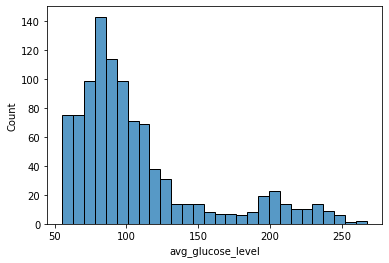

In [114]:
sns.histplot(data=sample_1000)

#### **(a) Known population standard deviation, and sample sizes of 100 and 1000**

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

alpha ==> confidence level <br/>
loc ==> sample mean  <br/>
scale ==> standard error

#### Sample size 100

In [115]:
n = 100
n

100

In [116]:
sample_100_mean = sample_100.mean()
sample_100_mean

107.90570000000001

In [117]:
standard_error_100 = population_std / np.sqrt(n)
standard_error_100

4.528356015058198

In [118]:
norm.interval(alpha=confidence_level, loc=sample_100_mean, scale=standard_error_100)

(99.03028530131063, 116.7811146986894)

#### Sample size 1000

In [119]:
n = 1000
n

1000

In [120]:
sample_1000_mean = sample_1000.mean()
sample_1000_mean

107.67422

In [121]:
standard_error_1000 = population_std / np.sqrt(n)
standard_error_1000

1.4319919063707645

In [122]:
norm.interval(alpha=confidence_level, loc=sample_1000_mean, scale=standard_error_1000)

(104.86756743736045, 110.48087256263956)

#### **(b) Unknown population standard deviation, and sample sizes of 100 and 1000**

#### Sample size 100

In [123]:
n = 100
n

100

In [124]:
sample_100_mean = sample_100.mean()
sample_100_mean

107.90570000000001

In [125]:
sample_100_std = sample_100.std()
sample_100_std

47.96907099613587

In [126]:
standard_error_100 = sample_100_std / np.sqrt(n)
standard_error_100

4.796907099613587

In [127]:
norm.interval(alpha=confidence_level, loc=sample_100_mean, scale=standard_error_100)

(98.50393484757289, 117.30746515242713)

#### Sample size 1000

In [128]:
n = 1000
n

1000

In [129]:
sample_1000_mean = sample_1000.mean()
sample_1000_mean

107.67422

In [130]:
sample_1000_std = sample_1000.std()
sample_1000_std

46.15896726585909

In [131]:
standard_error_1000 = sample_1000_std / np.sqrt(n)
standard_error_1000

1.459674710012697

In [132]:
norm.interval(alpha=confidence_level, loc=sample_1000_mean, scale=standard_error_1000)

(104.81331013923118, 110.53512986076883)

# 4. Calculating Sample Sizes

<img src='./imgs/calculating_sample_sizes.png' width=700/>

## Exercise 1
Suppose we want to investigate the **mean income** from the brazilian population. According to the last census, the **population standard deviation** is **R\$ 4000,00**. Assuming a **95\% confidence level** and a **margin of error** (with respect to the sample mean) of **R\$ 100,00**, what should be the **sample size**? 

### Population standard deviation (𝜎)

In [133]:
population_std = 4000
population_std

4000

### Confidence level (1 - α)

In [134]:
confidence_level = 0.95
confidence_level

0.95

### Significance level (α)

In [135]:
significance_level = 1 - confidence_level
significance_level

0.050000000000000044

### Margin of Error (e)

In [136]:
margin_of_error = 100
margin_of_error

100

### Critical value (𝒛𝜶/𝟐 = z0.025)

In [137]:
critical_value = 1.96
critical_value

1.96

### Calculating the sample size (n)

In [139]:
n = (critical_value * (population_std / margin_of_error)) ** 2
n

6146.560000000001

In [140]:
n = int(round(n))
n

6147

## Exercise 2
In a batch of **10,000 cans** of soda, a simple random sample of **200 cans** was collected to validate the amount of soda. The found **sample standard deviation** was **16 ml**. Each can costs **R\$ 4,00** and is thrown away after the experiment.

The manufacturer stipulates a **maximum error on the population average of only 4 ml**. To ensure a **95\% confidence level** what sample size should be selected for this study? How much  will the company save in the next experiment/validation?

### Population size (N)

In [141]:
N = 10000
N

10000

### Calculating the critical value (z-score ==> 𝒛𝜶/𝟐 == z0.025): 95% confidence value

In [142]:
critical_value = 1.96
critical_value

1.96

### Calculating the sample standard deviation (s)

In [143]:
sample_std = 16
sample_std

16

### Margin of Error (e)

In [144]:
margin_of_error = 4
margin_of_error

4

### Calculating the sample size (n)

In [146]:
n = ((critical_value ** 2) * (sample_std ** 2) * N) / (((critical_value ** 2) * (sample_std ** 2)) + ((margin_of_error ** 2) * (N - 1)))
n

61.096178292185606

In [147]:
n = int(round(n))
n

61

Note that the number of cans (sample size) necessary to meet the requirements is **61**. Therefore, it is not necessary to collect 200 cans as was done before, thus saving money.

### Savings

In [148]:
cost_per_can = 4
cost_per_can

4

In [149]:
(200 - n) * cost_per_can

556

The company will save R$ 556 in the next experiments.

# 5. Bootstrap Confidence Interval

<img src='./imgs/bootstrap_confidence_interval.png' width=700 />

## Exercise
Given a dataset from stroke patients, we want to study their **mean glucose level**.
Provide **95% bootstrap confidence intervals** for sample sizes of **100** and **1000**.

**Dataset:** https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [150]:
# dataset with data about stroke patients
df = pd.read_csv('./datasets/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [151]:
population = df['avg_glucose_level']
population

0       228.69
1       202.21
2       105.92
3       171.23
4       174.12
         ...  
5105     83.75
5106    125.20
5107     82.99
5108    166.29
5109     85.28
Name: avg_glucose_level, Length: 5110, dtype: float64

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

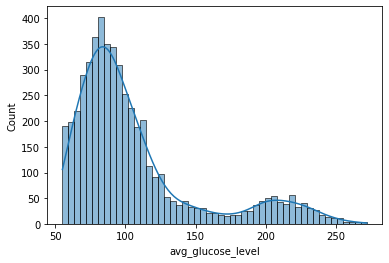

In [153]:
sns.histplot(population, kde=True)

#### True **Population Mean**

In [154]:
population.mean()

106.1476771037182

### Sample size: 100

1. Get a sample S from the population

In [157]:
# original sample
sample_100 = population.sample(100, random_state=999)
sample_100

4358     80.94
4779     66.71
931      78.11
3917     90.00
1095    103.94
         ...  
1566    101.43
222     205.35
3075     80.92
580     107.47
1947     65.95
Name: avg_glucose_level, Length: 100, dtype: float64

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

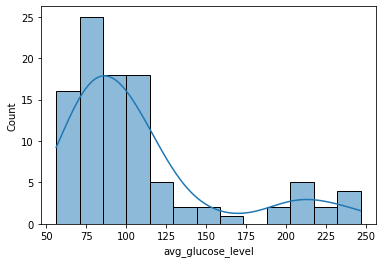

In [158]:
sns.histplot(sample_100, kde=True)

2. Repeat k times:<br/>
    2.1. Generate a bootstrap sample by **resampling S**<br/>
    2.2. Calculate the desired statistic for the bootstrap sample

In [160]:
k = 10000
k

10000

In [162]:
# bootstrap_sampling_distribution = []

# for _ in range(10000):
#     bootstrap_sample = sample_100.sample(100, replace=True)
#     mean = bootstrap_sample.mean()
#     bootstrap_sampling_distribution.append(mean)

bootstrap_sampling_distribution = [sample_100.sample(100, replace=True).mean() for _ in range(k)]
bootstrap_sampling_distribution[:5]

[108.82780000000001,
 113.50370000000002,
 107.28499999999998,
 107.6204,
 103.6309]

3. Build the sampling distribution for the statistic

<AxesSubplot:ylabel='Count'>

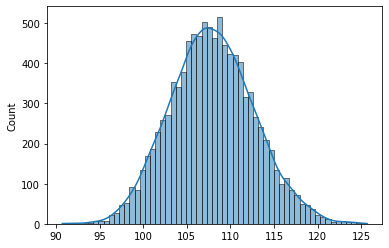

In [163]:
sns.histplot(bootstrap_sampling_distribution, kde=True)

4. Compute the interval around the mean with the concentration of c% observations/values<br/>
    4.1. c% is the confidence level = 1 – α<br/>
    4.2. The interval consists of the α/2 percentile and (1 - α/2) percentile <br/>
    4.3. Thus, just sort the statistics and return the values of theses percentiles

### ALTERNATIVE 1

In [164]:
confidence_level, significance_level

(0.95, 0.050000000000000044)

In [165]:
sorted_bootstrap_sampling_distribution = sorted(bootstrap_sampling_distribution)
sorted_bootstrap_sampling_distribution[:5]

[90.71390000000001,
 90.80680000000002,
 92.07110000000003,
 92.1921,
 93.43699999999997]

In [166]:
percentile_a = significance_level / 2
percentile_a

0.025000000000000022

In [168]:
percentile_b = 1 - (significance_level / 2)
percentile_b

0.975

In [169]:
len(sorted_bootstrap_sampling_distribution), k

(10000, 10000)

In [170]:
index_percentile_a = int(percentile_a * k)
index_percentile_a

250

In [171]:
index_percentile_b = int(percentile_b * k)
index_percentile_b

9750

In [172]:
confidence_interval = (
    sorted_bootstrap_sampling_distribution[index_percentile_a],
    sorted_bootstrap_sampling_distribution[index_percentile_b]
)
confidence_interval

(98.87209999999999, 117.6375)

### ALTERNATIVE 2

In [173]:
np.percentile(sorted_bootstrap_sampling_distribution, 2.5), \
np.percentile(sorted_bootstrap_sampling_distribution, 97.5)

(98.87166249999999, 117.63730499999998)

In [174]:
np.percentile(bootstrap_sampling_distribution, 2.5), \
np.percentile(bootstrap_sampling_distribution, 97.5)

(98.87166249999999, 117.63730499999998)

#### Boostrap Sampling Distribution Mean 

In [176]:
population.mean() - np.array(bootstrap_sampling_distribution).mean()

-1.762337596281796

### Sample size: 1000

1. Get a sample S from the population

In [177]:
# original sample
sample_1000 = population.sample(1000, random_state=999)
sample_1000

4358     80.94
4779     66.71
931      78.11
3917     90.00
1095    103.94
         ...  
3278     84.70
1204    121.19
490      65.24
2650     59.00
34       84.20
Name: avg_glucose_level, Length: 1000, dtype: float64

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

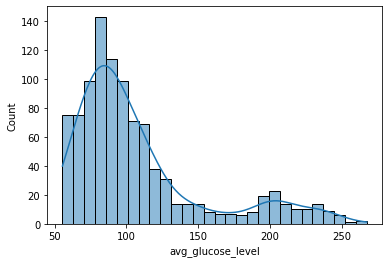

In [178]:
sns.histplot(sample_1000, kde=True)

2. Repeat k times:<br/>
    2.1. Generate a bootstrap sample by **resampling S**<br/>
    2.2. Calculate the desired statistic for the bootstrap sample <br/>
3. Build the sampling distribution for the statistic

Instead of doing these steps "manually", we can use the method `bootstrap` from the Seaborn package.

In [179]:
bootstrap_sampling_distribution_1000 = sns.algorithms.bootstrap(sample_1000, n_boot=10000, func=np.mean)
bootstrap_sampling_distribution_1000[:5]

array([108.57105, 110.35268, 108.9931 , 105.77169, 110.1719 ])

<AxesSubplot:ylabel='Count'>

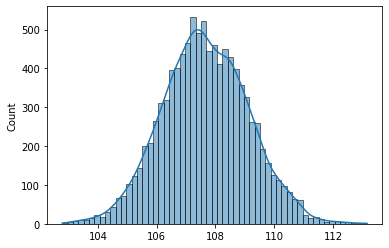

In [180]:
sns.histplot(bootstrap_sampling_distribution_1000, kde=True)

4. Compute the interval around the mean with the concentration of c% observations/values<br/>
    4.1. c% is the confidence level = 1 – α<br/>
    4.2. The interval consists of the α/2 percentile and (1 - α/2) percentile <br/>
    4.3. Thus, just sort the statistics and return the values of theses percentiles

In [181]:
confidence_interval = (
    np.percentile(bootstrap_sampling_distribution_1000, 2.5),
    np.percentile(bootstrap_sampling_distribution_1000, 97.5)
)
confidence_interval

(104.85421849999999, 110.5236115)

#### Boostrap Sampling Distribution Mean 

In [182]:
population.mean() - np.array(bootstrap_sampling_distribution_1000).mean()

-1.5095668062818106

# 6. Comparing the Calculated 95% Confidence Intervals

In [194]:
confidence_interval_table = pd.DataFrame({
    'Sample Size: 100': [(99.03, 116.78), (98.50, 117.30), (98.87, 117.63)],
    'Sample Size: 1000': [(104.86, 110.48), (104.81, 110.53), (104.85, 110.52)]
}, index=[('Confidence Interval - Known population std'),
          ('Confidence Interval - Unknown population std'),
         'Bootstrap']
)

In [195]:
confidence_interval_table

,Sample Size: 100,Sample Size: 1000
Confidence Interval - Known population std,"(99.03, 116.78)","(104.86, 110.48)"
Confidence Interval - Unknown population std,"(98.5, 117.3)","(104.81, 110.53)"
Bootstrap,"(98.87, 117.63)","(104.85, 110.52)"


#### Population Mean = 106.1476771037182